In [198]:
%%capture
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip3 install seaborn
import string

In [199]:
import seaborn as sns

# Load, Inspect, and Clean DataFrame

In [200]:
read_data  = pd.read_pickle('../../stories') # read in data from pickle
story_df = pd.DataFrame(read_data) # create df from pickle data
raw_df = pd.DataFrame(pd.read_csv("../../nytwit_v1-1.tsv", sep='\t')) # core df we will concat sentence data to


In [201]:
raw_df_filtered = raw_df.drop(raw_df.loc[raw_df['URL'].values == 'not found'].index, axis = 0) # drop rows where URL is not found


In [202]:
story_df = story_df.rename(columns={
    0:"Story_Examples"
})
story_df.head()

,Story_Examples
0,"7, 2017“How much does it cost?” I asked Hirota..."
1,"7, 2017“How much does it cost?” I asked Hirota..."
2,"7, 2017“How much does it cost?” I asked Hirota..."
3,"8, 2017Uma Thurman at Cannes in May.Credit...S..."
4,Outsiders are allowed to enter Canyon de Chell...


# Clean up the Story DF

In [203]:
story_df.reset_index(drop=True, inplace=True)

def remove_punctuation(text):
    no_punct = "".join([w for w in text if w not in string.punctuation])
    no_punct.replace('"', "")
    return no_punct

story_df['Story_Examples'] = story_df['Story_Examples'].apply(lambda x: remove_punctuation(x)) # remove punctuation from sentences

In [204]:
story_df

,Story_Examples
0,7 2017“How much does it cost” I asked HirotaWe...
1,7 2017“How much does it cost” I asked HirotaWe...
2,7 2017“How much does it cost” I asked HirotaWe...
3,8 2017Uma Thurman at Cannes in MayCreditStepha...
4,Outsiders are allowed to enter Canyon de Chell...
...,...
2577,Get Used to Her The New York Times ...
2578,Get Used to Her The New York Times ...
2579,The New York Times SectionsS...
2580,When it’s really good horror can push you up a...


# Clean up the Core DF

In [205]:
raw_df_filtered.reset_index(drop=True, inplace=True)
raw_df_filtered.head()

,Time,Word,Category,URL
0,Tue Nov 07 19:12:11 2017,ujigami,filtered,https://www.nytimes.com/2017/11/07/travel/shri...
1,Tue Nov 07 19:12:15 2017,ganbarro,filtered,https://www.nytimes.com/2017/11/07/travel/shri...
2,Tue Nov 07 19:12:25 2017,yamahoko,filtered,https://www.nytimes.com/2017/11/07/travel/shri...
3,Wed Nov 08 10:01:04 2017,rememed,affix,https://www.nytimes.com/2017/11/08/opinion/ang...
4,Wed Nov 08 11:01:14 2017,andpinyon,filtered,https://www.nytimes.com/2017/11/08/sports/nava...


# Concat dataframes, perform final inspections of the data

In [206]:
df = pd.concat([raw_df_filtered, story_df], axis =1)

In [207]:
df.columns = df.columns.str.replace(' ', '_')
df.columns

Index(['Time', 'Word', 'Category', 'URL', 'Story_Examples'], dtype='object')

### Check for empty strings

In [208]:
[story for story in df['Story_Examples'] if len(story) == 0]

['', '', '']

In [209]:
df = df.drop(df.loc[df['Story_Examples'] == ''].index, axis = 0) # drop words with no stories , i.e. the URL did not work or the stories are no longer public
df.reset_index(drop=True, inplace=True)


In [210]:
df.Story_Examples

0       7 2017“How much does it cost” I asked HirotaWe...
1       7 2017“How much does it cost” I asked HirotaWe...
2       7 2017“How much does it cost” I asked HirotaWe...
3       8 2017Uma Thurman at Cannes in MayCreditStepha...
4       Outsiders are allowed to enter Canyon de Chell...
                              ...                        
2574    Get Used to Her The New York Times            ...
2575    Get Used to Her The New York Times            ...
2576     The New York Times                  SectionsS...
2577    When it’s really good horror can push you up a...
2578    This is churrasco Brazilian barbecue opulent a...
Name: Story_Examples, Length: 2579, dtype: object

# Number of NA's

In [211]:
sum(pd.isna(df.Story_Examples))

0

# Calculate length of stories in Story_Examples

In [212]:
story_lengths_all = [len(story.split(" ")) for story in df.Story_Examples]
max_min_difference = abs(np.min(story_lengths_all) - np.max(story_lengths_all))

#5-number summary
min_ = np.min(story_lengths_all)
q1 = np.quantile(a = story_lengths_all, q = .25)
q2 = np.quantile(a = story_lengths_all, q = .5)
q3 = np.quantile(a = story_lengths_all, q = .75)
max_ = np.max(story_lengths_all)
#basic stats
iqr = q3 - q1

max_non_outlier = q3 + 1.5*iqr
min_non_outlier = q1 - 1.5*iqr

outlier_story_lengths = [length for length in story_lengths_all if (length > max_non_outlier) | (length < min_non_outlier)]
remove_extremities = [val for val in story_lengths_all if val < 40000]


print("IQR is {}".format(iqr))
print("MAX is {}".format(max_))
print("MIN is {}".format(min_))
print("Q1 is {}".format(q1))
print("Q3 is {}".format(q3))
print("Min Outlier Threshold is {}".format(min_non_outlier))
print("Max Outlier Threshold is {}".format(max_non_outlier))
print(str(round((len(outlier_story_lengths)/len(sentence_df))*100, 2)) + "% of the story lengths are outliers.") # % of dataset that is an outlier...


IQR is 593.0
MAX is 11650
MIN is 31
Q1 is 793.0
Q3 is 1386.0
Min Outlier Threshold is -96.5
Max Outlier Threshold is 2275.5
8.87% of the story lengths are outliers.


[[]]

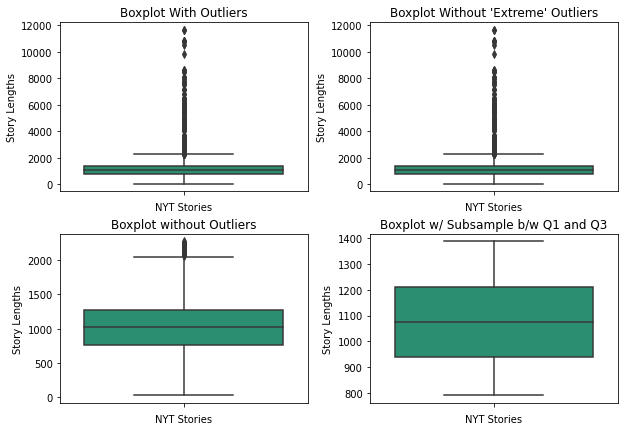

In [213]:
# set up figure
fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2, 2)
fig.set_figheight(7)
fig.set_figwidth(10)
plt.subplots_adjust(wspace = .25, hspace=.25)

#subplot 0,0
ax1.title.set_text("Boxplot With Outliers")
ax1.set_xlabel("NYT Stories")
ax1.set_ylabel("Story Lengths")
plot1 = sns.boxplot(data = story_lengths_all, color=sns.set_palette("Dark2"), ax=ax1)
plot1.set(xticklabels=[])


#subplot 0,1
ax2.title.set_text("Boxplot Without 'Extreme' Outliers")
ax2.set_xlabel("NYT Stories")
ax2.set_ylabel("Story Lengths")
plot2 =sns.boxplot(data = remove_extremities, ax=ax2) 
plot2.set(xticklabels=[])

#subplot 1, 0
ax3.title.set_text("Boxplot without Outliers")
ax3.set_xlabel("NYT Stories")
ax3.set_ylabel("Story Lengths")
plot3 = sns.boxplot(data = [length for length in story_lengths_all if ((length>= min_non_outlier) & (length <= max_non_outlier))], ax = ax3)
plot3.set(xticklabels=[])

#subplot 1, 1
ax4.title.set_text("Boxplot w/ Subsample b/w Q1 and Q3")
ax4.set_xlabel("NYT Stories")
ax4.set_ylabel("Story Lengths")
plot4 = sns.boxplot(data = [length for length in story_lengths_all if ((length>=q1) & (length <= q3))], ax = ax4)
plot4.set(xticklabels=[])

# Empirical CDF to show us what % of the data lies below a certain sentence length 

Text(0, 0.5, '% of stories')

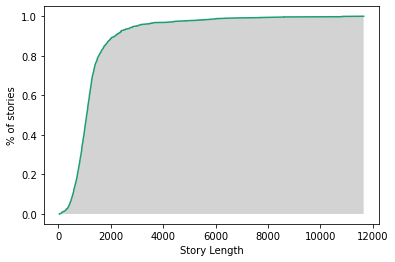

In [214]:
plt.plot(np.sort(story_lengths_all), np.linspace(0, 1, len(story_lengths_all)))
plt.fill_between(np.sort(story_lengths_all), np.linspace(0, 1, len(story_lengths_all)), facecolor='lightgray')
plt.xlabel("Story Length")
plt.ylabel("% of stories")

### roughly 90% of our story lengths fall below 2000 words. 

In [215]:
%%capture
tokenize_sentences = [nltk.word_tokenize(str(sent)) for sent in story_lengths_all]

# Term Frequency

### Let's measure the frequency of our target words (Word column) in each Sentence Example (Sentence_Example column)

$$tf(t, d) = \frac{count\space of\space t\space in\space d}{number\space of\space words\space in\space d}$$

### Example for First Word

In [216]:
df.head(1)

,Time,Word,Category,URL,Story_Examples
0,Tue Nov 07 19:12:11 2017,ujigami,filtered,https://www.nytimes.com/2017/11/07/travel/shri...,7 2017“How much does it cost” I asked HirotaWe...


$$tf(ujigami, "As\space Hirota\space put\space it...") = \frac{count\space of\space ujigami\space in\space "As\space Hirota\space put\space it..."}{number\space of\space words\space in\space " As\space Hirota\space put\space it..."}$$



In [217]:
%%capture
def dictFromColumns(data, col1, col2):
    contentsCol1 = [val for val in data[col1].values]
    contentsCol2 = [val for val in data[col2].values]
    dictionaryOfColumns = dict(zip(contentsCol1, contentsCol2))
    return dictionaryOfColumns


# To Do: 

### 1. Create an array of stories and words that are within the IQR
### 2. Map those arrays together using a dictionary
### 3. Calculate the TF for those words using the tf function.

In [303]:
q1_to_q3_story_lengths = [story for story in story_lengths_all if ((int(story) >= q1) & (int(story)<= q3))]
q1_to_q3_stories =  [story for story in df.Story_Examples if (len(story.split(" ")) in q1_to_q3_story_lengths)]


In [304]:
len(q1_to_q3_stories)

1292

In [305]:
q1_to_q3_words = set()

for word in df.Word:
    for story in q1_to_q3_stories:
        if (word in story):
            q1_to_q3_words.add(word)

In [306]:
len(q1_to_q3_words)

1186

In [295]:
def tf(t, d):
    tf_scores = []
    for i in range(len(t)):
        tally =0
        word = t[i]
        doc = list(nltk.word_tokenize(d[i]))
        for w in doc:
            if str(w) == str(word):
                tally+=1
        tf_scores.append((tally/len(doc)))
    return tf_scores


In [296]:
%%capture 
tf_vals = tf(filtered_words, q1_to_q3_sentence)

### With TF, the length of the document can be dominated by words such as 'and,' 'had,' and other fillers. This can skew the TF and provide us with invaluable information.

### TF-IDF will 'regularize' our documents (think of regularization in SVM where large ranges of #'s that aren't normalized can skew the decision boundary, so we scale the axes). This helps hold constant the effect of filler words.

# Lets implement TF-IDF now

### document frequency: how many times a word, t, appears across all documents
### term frequency: occurrence of a word, t, across 1 document
### inverse document frequency: ${\frac{N}{df}}$ where N is the number of documents in the set and df is the document frequency

### log-idf dampens the effect of having a large set of documents : $ idf(t) = log(\frac{N}{df+1})$

### So, tf-idf = $ tf(t, d) * log(\frac{N}{df+1}) $ . Since we have already calculated tf, we just need to find idf anf then multiply the two. 

In [85]:
def df(words, sentences):
    """
    check the frequency of each word across all documents
    """
    count_tracker = dict()
    for word in words:
        counter = 0
        for sent in sentences:
            if word in sent:
                counter += 1
            else:
                continue
        count_tracker[word] = counter
    return count_tracker


In [86]:
df(filtered_words, q1_to_q3_sentence)
df_vals = list(df(filtered_words, q1_to_q3_sentence).values())

In [89]:
%%capture
def compute_tfidf(tf, df):
    idf = [(np.log(int(len(df))/float(val))) for val in df]
    tfidf = [float(val1)*float(val2) for val1 in tf for val2 in idf]
    return tfidf

compute_tfidf(tf_vals, df_vals)


In [90]:
compute_tfidf(tf_vals, df_vals)

[0.13270862915062293,
 0.13270862915062293,
 0.13270862915062293,
 0.13270862915062293,
 0.13270862915062293,
 0.13270862915062293,
 0.13270862915062293,
 0.13270862915062293,
 0.13270862915062293,
 0.13270862915062293,
 0.13270862915062293,
 0.13270862915062293,
 0.13270862915062293,
 0.13270862915062293,
 0.13270862915062293,
 0.13270862915062293,
 0.13270862915062293,
 0.13270862915062293,
 0.13270862915062293,
 0.11987257025136466,
 0.11987257025136466,
 0.13270862915062293,
 0.13270862915062293,
 0.13270862915062293,
 0.13270862915062293,
 0.13270862915062293,
 0.13270862915062293,
 0.13270862915062293,
 0.13270862915062293,
 0.11987257025136466,
 0.11987257025136466,
 0.13270862915062293,
 0.13270862915062293,
 0.13270862915062293,
 0.13270862915062293,
 0.13270862915062293,
 0.13270862915062293,
 0.13270862915062293,
 0.13270862915062293,
 0.13270862915062293,
 0.13270862915062293,
 0.13270862915062293,
 0.13270862915062293,
 0.13270862915062293,
 0.13270862915062293,
 0.1327086